# Preamble

In [1]:
import numpy as np
import matplotlib.pylab as plt

import astropy.cosmology as cosmo
import astropy.units as unit
import h5py
import scipy.integrate as si
from scipy.interpolate import RectBivariateSpline, interp1d
from scipy.stats import truncnorm
import scipy.stats as ss
import corner

# Truth

### Primary Mass

$$
m \sim \pi(m|\vec{\lambda}) = f_1 N(m|\mu_1, \sigma_1) + (1-f_1) N(m|\mu_2, \sigma_2)
$$

### Mass Ratio

$$
q = 1
$$

### Redshift

$$
z \sim \beta(a, b)*10
$$

### Finn-Chernoff Parameter

$$
\Theta \sim \beta(2, 4)
$$

In [2]:
# mass population
f1 = 0.7
mu1 = 35.0
sigma1 = 3.0
mu2 = 55.0
sigma2 = 1.0

# redshift population
az = 3.0
bz= 9.0

# Finn and Chernoff population
at = 2.0
bt = 4.0

In [3]:
rng = np.random.default_rng(333165393797366967556667466879860422123)
Ninj = 10000

Text(0, 0.5, 'Frequency')

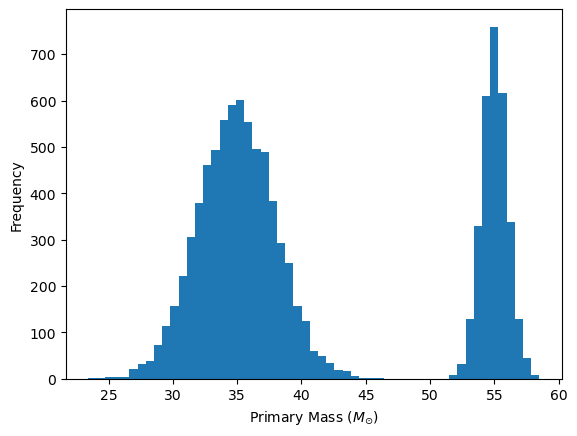

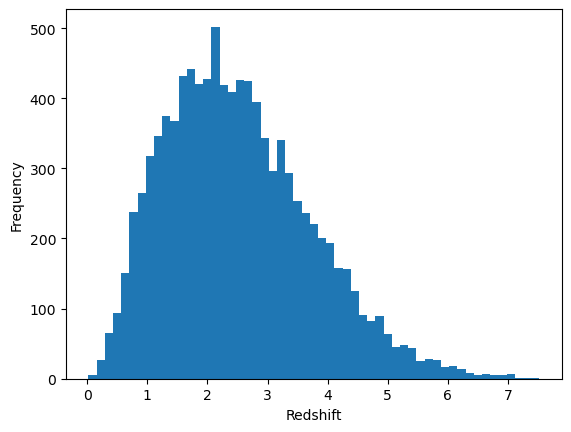

In [4]:
# mass
rnd = rng.uniform(0.0, 1.0, Ninj)
sel = f1>rnd
m1 = rng.normal(mu1, sigma1, Ninj)
m2 = rng.normal(mu2, sigma2, Ninj)
m = sel*m1 + (1-sel)*m2
np.random.shuffle(m)
_ = plt.hist(m, bins=55)
plt.xlabel(r'Primary Mass ($M_{\odot}$)')
plt.ylabel('Frequency')

# mass ratio
q = 1.0
m2 = q*m

# redshift
z = rng.beta(az, bz, Ninj)*10
plt.figure()
_ = plt.hist(z, bins=55)
plt.xlabel('Redshift')
plt.ylabel('Frequency')

In [5]:
with h5py.File("truth.h5", "w") as file:
    file.create_dataset('mtrue', data=m)
    file.create_dataset('ztrue', data=z)
file.close()